## R.1 Review questions from Disc1_intro

- Quotes: You can use either double ("") or single quotes ('')
- If you want to keep track of the original code you can always open up a second tab to write code

## R.2 Review of functions used in Disc1_intro

- `Function:` read.csv("NAMEOFFILE.csv")
    - Reads csv
- `Function:` head(DF_NAME, # of lines you want to display)
    - Show first lines of data frame
- `Function:` names(DF_NAME)
    - Shows column names
- `Function:` summary(DF_NAME)
    - Shows summary stats
- `Function:` mean(DF_NAME$\mathit{\$}$Col_Name)
    - Shows mean of certain column
- `Function:` sd(DF_NAME$\mathit{\$}$Col_name)
    - Shows standard deviation of certain column


# Problem set 1

- Below are the functions necessary to complete problem set 1

## A.1 Import data

In [1]:
#Imports internal data set
vote_df = read.csv('vote.csv')

### A.1.1 Show the first 2 rows of mtcars

In [2]:
head(vote_df,2)

state,vote,income,education,age,sex
AR,1,9,2,73,0
AR,1,11,2,24,0


## A.2 Import dplyr

- Note you do not have to use DPLYR to complete the assignment!
- I want to introduce you to the idea of libraries!
    - Libraries simply allow you to use more functions!
- If you want to know more about DPLYR please visit this [tutorial](https://github.com/corybaird/Development_economics/blob/master/TA_Sessions/R/W1_DPLYR/W1_DPLYR_code.ipynb) I made for a development economics course 

### A.2.1.1 Install library
#### Common mistake!--Confirm you have installed libraries
- Usually you only have to do this once!

In [4]:
install.packages('dplyr')

### A.2.2 Import library

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# 1. Frequency tables
`PS1 corresponding problem: 1b`

## 1.1 Create table


### 1.1.1 Create table: DPLYR
- DPLYR-Count
- `Function:` DF_Name %>% count(Column_Name)

In [12]:
vote_df %>% 
count(education) 

education,n
1,217
2,487
3,403
4,395


#### 1.1.1.1 Save output to csv

In [ ]:
vote_df %>% 
count(education) %>% 
write.csv('Education.csv', row.names=FALSE)

### 1.1.2 Create table: table function
`Function:` table(DF_NAME$\mathit{\$}$Col_Name)

In [5]:
# data: DFNAME$COLUMNNAME
# function: table()
table_ans = table(vote_df$education)
table_ans


  1   2   3   4 
217 487 403 395 

## 1.2 Create relative frequency table
- The same data as above but turned into a percentage

### 1.2.2 Create table: table function

In [16]:
prop.table(table_ans)


        1         2         3         4 
0.1444740 0.3242344 0.2683089 0.2629827 

### 1.2.1 Create table: DPLYR
- DPLYR-Count-mutate

In [17]:
vote_df %>% 
count(education) %>% 
mutate(
    Percentage = n/sum(n) 
      )

education,n,Percentage
1,217,0.1444740
2,487,0.3242344
3,403,0.2683089
4,395,0.2629827


# 2. Histogram
- `PS1 corresponding problem: 1c`

### 2.2.1 Create histogram: histogram function
- `Function:` hist(Data_frame$\mathit{\$}$Column, xlab="", ylab="", main="")



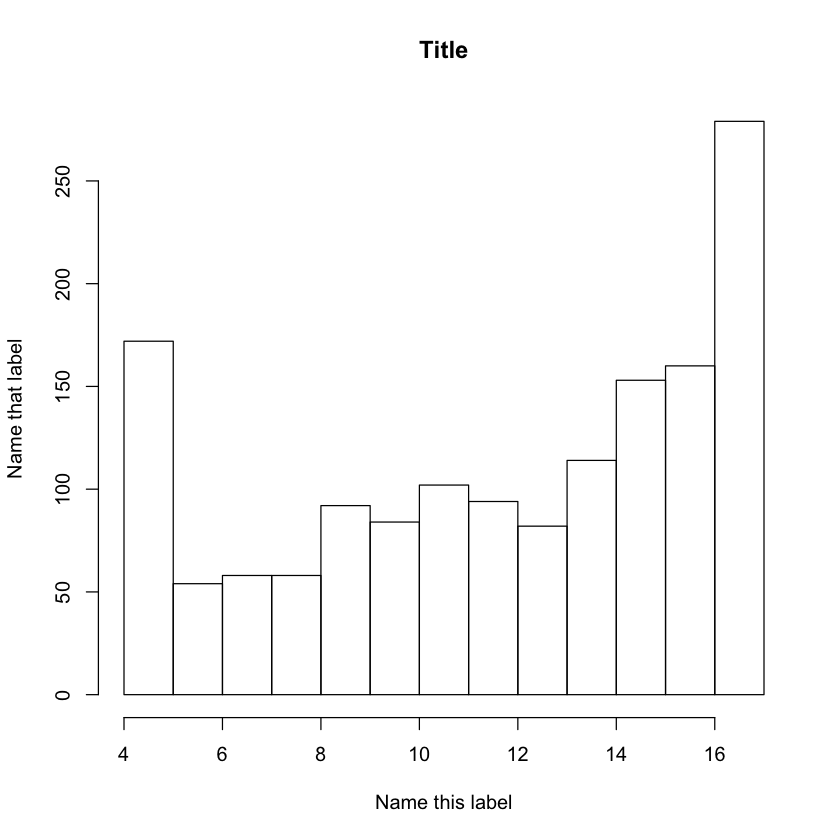

In [20]:
hist(vote_df$income, xlab="Name this label", ylab="Name that label", main="Title")

### 2.2.2 Create histogram: ggplot2
- ggplot2 is another library you must install like DPLYR

In [24]:
#install.packages('ggplot2') # If you have not installed
library(ggplot2)

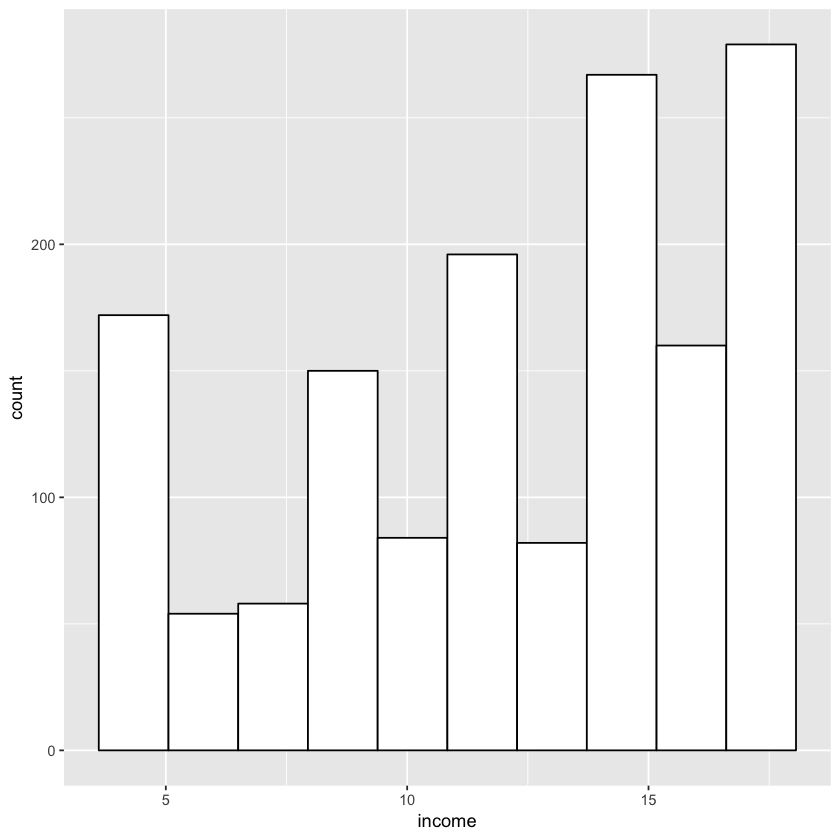

In [25]:
vote_df %>% 
ggplot(aes(x=income)) +  #x= Column_name
geom_histogram(color="black", fill="white", bins=10)

# 3. Summarise
- `PS1 corresponding problem: 1e`

## 3.1 Summary stats: summary()
- `Function:` summary(DF_NAME$\mathit{\$}$Col_Name)
    - Reads csv

In [29]:
summary(vote_df$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00    9.00   13.00   12.06   16.00   17.00 

## 3.2 Summary stats: dplyr

In [30]:
vote_df %>% 
select(income, education) %>% 
summary()

     income        education   
 Min.   : 4.00   Min.   :1.00  
 1st Qu.: 9.00   1st Qu.:2.00  
 Median :13.00   Median :3.00  
 Mean   :12.06   Mean   :2.65  
 3rd Qu.:16.00   3rd Qu.:4.00  
 Max.   :17.00   Max.   :4.00  

# 4. Groupby

## 4.1 Summary stats: mean, sd function

In [38]:
#mean
female_mean =  mean(vote_df$income[vote_df$sex==1])

#sd
female_sd = sd(vote_df$income[vote_df$sex==1])

#Put both results in the same table
summary_table = cbind(female_mean, female_sd)
summary_table

female_mean,female_sd
11.78095,4.310048


## 4.2 Summary stats: dplyr--groupby

In [40]:
vote_df %>% 
group_by(sex) %>% 
summarise(
    avg_wt = mean(income),
    sd_wt = sd(income))

sex,avg_wt,sd_wt
0,12.41692,4.164712
1,11.78095,4.310048
